## リウェイティング

In [22]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import matplotlib.ticker as ptick
from IPython.core.pylabtools import figsize
import math

plt.style.use('ggplot')

10 	 10


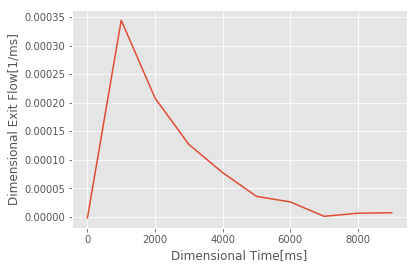

In [23]:
data_file = 'TAP_artificial_data_De=1.5_ka=20_kd=5_sigma=5e-6_1-10^4ms.dat'
data_points = 10
epsilon = 1.0
length = 35.0

def p_n(n):
    return (n+0.5)*np.pi

def r_plus(p_n, k_a, k_d):
    return ( -(p_n**2 + k_a + k_d)+np.sqrt((p_n**2 + k_a + k_d)**2 - 4*(p_n**2)*k_d) )/2.0

def r_minus(p_n, k_a, k_d):
    return ( -(p_n**2 + k_a + k_d)-np.sqrt((p_n**2 + k_a + k_d)**2 - 4*(p_n**2)*k_d) )/2.0

def A_n(p_n, r_plus, r_minus, k_a):
    return (r_plus + (p_n**2) + k_a)/(r_plus - r_minus)

def Flow(diffusivity, k_a, k_d, epsilon, length, time):
    dimensionless_time = time * diffusivity/(epsilon*length**2)
    r_flow = np.zeros(len(time))
    for n in range(100):
        pn = p_n(n); r_p = r_plus(p_n=pn, k_a=k_a, k_d=k_d); r_m = r_minus(p_n=pn, k_a=k_a, k_d=k_d)
        A = A_n(p_n=pn, r_plus=r_p, r_minus=r_m, k_a=k_a)
        r_flow += np.power(-1.0,n)*(2.0*n+1.0)*( A*np.exp(r_m*dimensionless_time)+(1.0-A)*np.exp(r_p*dimensionless_time) )
    r_flow *= np.pi
    r_flow *= diffusivity/(epsilon*np.power(length, 2))

    return r_flow

dimensional_time = np.zeros(data_points)
dimensional_exit_flow = np.zeros(data_points)
i = 0
j = 0
for line in open(data_file, "r"):
    if i%(10000/data_points)==0:
        data = line.split("\t")
        dimensional_time[j] = data[0]
        dimensional_exit_flow[j] = data[1]
        j += 1
    else:
        pass
    i += 1

print(len(dimensional_time), "\t", len(dimensional_exit_flow))

fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(dimensional_time, dimensional_exit_flow)

ax.set_xlabel('Dimensional Time[ms]')
ax.set_ylabel('Dimensional Exit Flow[1/ms]')

plt.show()

In [24]:
def file_output_one(file, T, model):
    
    diffusivity_0 = np.zeros([model.shape[0], T])
    diffusivity_1 = np.zeros([model.shape[0], T])
    k_a = np.zeros([model.shape[0], T])
    k_d = np.zeros([model.shape[0], T])
    sigma_0 = np.zeros([model.shape[0], T])
    E = np.zeros([model.shape[0], T])

    dlogp = np.zeros([model.shape[0], T])
    
    pick = np.zeros([model.shape[0], 5])
    update = np.zeros([model.shape[0], 5])
    exchange_rate = np.zeros(model.shape[0]-1)
    
    l = 0; m = 0; t = 0; m_ = 0
    for line in open(file, "r"):
        data = line.split("\t")
        try :
            tmp = float(data[0])
            if 3<=l<=model.shape[0]+2:
                for i in range(5):
                    pick[m_, i] = float(data[i])
                m_ += 1
            elif (model.shape[0]+5)<=l<=(2*model.shape[0]+4):
                for i in range(5):
                    update[m_, i] = float(data[i])
                m_ += 1
            elif l==(2*model.shape[0]+7):
                for i in range(model.shape[0]-1):
                    exchange_rate[i] = float(data[i])
            else:
                diffusivity_0[m, t] = data[0]
                diffusivity_1[m, t] = data[1]
                k_a[m, t] = data[2]
                k_d[m, t] = data[3]
                sigma_0[m, t] = data[4]
                E[m, t] = data[5]
                dlogp[m, t] = data[6]
                t += 1
        except :
            pass
        else :
            if t==T:
                m += 1
                t = 0
            if m_==model.shape[0]:
                m_ = 0
        finally :
            l += 1
            
    return diffusivity_0, diffusivity_1, k_a, k_d, sigma_0, E, dlogp, pick, update, exchange_rate

In [25]:
def file_output_two(file, T, model):
    
    diffusivity_0 = np.zeros([model.shape[0], T])
    diffusivity_1 = np.zeros([model.shape[0], T])
    k_a = np.zeros([model.shape[0], T])
    k_d = np.zeros([model.shape[0], T])
    sigma_0 = np.zeros([model.shape[0], T])
    E = np.zeros([model.shape[0], T])

    dlogp = np.zeros([model.shape[0], T])
    
    pick = np.zeros([model.shape[0], 5])
    update = np.zeros([model.shape[0], 5])
    exchange_rate = np.zeros(model.shape[0]-1)
    
    l = 0; m = 0; t = 0; m_ = 0
    for line in open(file, "r"):
        data = line.split("\t")
        try :
            tmp = float(data[0])
            if 4<=l<=model.shape[0]+3:
                for i in range(5):
                    pick[m_, i] = float(data[i])
                m_ += 1
            elif (model.shape[0]+6)<=l<=(2*model.shape[0]+5):
                for i in range(5):
                    update[m_, i] = float(data[i])
                m_ += 1
            elif l==(2*model.shape[0]+8):
                for i in range(model.shape[0]-1):
                    exchange_rate[i] = float(data[i])
            else:
                diffusivity_0[m, t] = data[0]
                diffusivity_1[m, t] = data[1]
                k_a[m, t] = data[2]
                k_d[m, t] = data[3]
                sigma_0[m, t] = data[4]
                E[m, t] = data[5]
                dlogp[m, t] = data[6]
                t += 1
        except :
            pass
        else :
            if t==T:
                m += 1
                t = 0
            if m_==model.shape[0]:
                m_ = 0
        finally :
            l += 1
            
    return diffusivity_0, diffusivity_1, k_a, k_d, sigma_0, E, dlogp, pick, update, exchange_rate

In [26]:
def energy(model, diffusivity_0, diffusivity_1, k_a, k_d, std,
           epsilon=epsilon, length=length, 
           time=dimensional_time, artificial_flow=dimensional_exit_flow):
    
    Energy = np.square(artificial_flow - ((1.-model)*Flow(diffusivity=diffusivity_0,
                                                     k_a=0., k_d=0.,
                                                     epsilon=epsilon, length=length, 
                                                     time=time) + \
                                          model*Flow(diffusivity=diffusivity_1,
                                                     k_a=k_a, k_d=k_d, 
                                                     epsilon=epsilon, length=length, 
                                                     time=time))
                      ).sum()
    
    Energy *= 1./(2.*std**2)
    Energy += (time.shape[0]/2.) * np.log(2.*np.pi*std**2) 
    
    return Energy


def dlog_p(model, diffusivity_0, diffusivity_1, k_a, k_d, 
           std, time=dimensional_time, artificial_flow=dimensional_exit_flow, 
           epsilon=epsilon, length=length):
    
    dlogp = -1./(std**2) \
            *(
                 (Flow(diffusivity=diffusivity_0, k_a=0, k_d=0, time=time, epsilon=epsilon, length=length) \
                  - Flow(diffusivity=diffusivity_1, k_a=k_a, k_d=k_d, time=time, epsilon=epsilon, length=length)) \
                 *(artificial_flow - (1-model)*Flow(diffusivity=diffusivity_0,
                                                    k_a=0, k_d=0,
                                                    time=time, epsilon=epsilon, length=length) \
                   - model*Flow(diffusivity=diffusivity_1, 
                                k_a=k_a, k_d=k_d, 
                                time=time, epsilon=epsilon, length=length)\
                   )
              ).sum()
           
    return dlogp

In [39]:
read_file_pass = '\\Users\\anbaigashi\\Desktop\\ABC\\2019\\March\\'

time = 204800
time_n = 204800
Temp = np.array([1, 2, 3, 4, 5], dtype=float)
beta = 1/Temp
print(beta)
model = 0.1*np.arange(0, 11, dtype=float)
print(model)

[ 1.          0.5         0.33333333  0.25        0.2       ]
[ 0.   0.1  0.2  0.3  0.4  0.5  0.6  0.7  0.8  0.9  1. ]


In [40]:
de0_one_T20 = ['zero', 'one', 'two', 'three', 'four']
de1_one_T20 = ['zero', 'one', 'two', 'three', 'four']
ka_one_T20 = ['zero', 'one', 'two', 'three', 'four']
kd_one_T20 = ['zero', 'one', 'two', 'three', 'four']
sigma_one_T20 = ['zero', 'one', 'two', 'three', 'four']
energy_one_T20 = ['zero', 'one', 'two', 'three', 'four']
dlogp_one_T20 = ['zero', 'one', 'two', 'three', 'four']
pick_one_T20 = ['zero', 'one', 'two', 'three', 'four']
update_one_T20 = ['zero', 'one', 'two', 'three', 'four']
exchange_one_T20 = ['zero', 'one', 'two', 'three', 'four']

In [41]:
for i in range(5):
    r_file = read_file_pass + 'EM_TAP-sigma_koukannashi_datapoints=10_T=204800mcs_Temp=20.0_model=0.0-1.0_replica=11_koushinhaba-m1p1m1e-5p1e-5_TAP_artificial_data_De=1.5_ka=20_kd=5_sigma=5e-6_1-10^4ms.dat_{}.dat'.format(i)
    de0_one_T20[i], de1_one_T20[i], ka_one_T20[i], kd_one_T20[i], sigma_one_T20[i], energy_one_T20[i], dlogp_one_T20[i],\
    pick_one_T20[i], update_one_T20[i], exchange_one_T20[i] = file_output_one(r_file, time, model)

In [43]:
def fig_dE(start, dlogp):
    fig = plt.figure(figsize=(8, 6))
    ax = fig.add_subplot(111)

    end = 2*start

    dlogp_m = np.zeros(11, dtype=float)
    dlogp_s = np.zeros(11, dtype=float)

    for i in range(11):
        bar_A_i = np.zeros(5, dtype=float)
        for j in range(5):
            bar_A_i[j] = dlogp[j][i][start:end].mean()
        dlogp_m[i] = bar_A_i.mean()

        sig = 0.
        for j in range(5):
            sig += (bar_A_i[j]-dlogp_m[i])**2
        sig /= (bar_A_i.shape[0]-1)
        sig = np.sqrt(sig)
        sig /= np.sqrt(bar_A_i.shape[0])
        dlogp_s[i] = sig


    ax.errorbar(0.1*np.arange(11, dtype=float), dlogp_m, yerr=dlogp_s, fmt='o', color='red')
    ax.set_xlabel('$M$')
    ax.set_ylabel('$<-dE/dM>$')

    #plt.savefig('teireikai_20190220_BayesFactorPath1.png')

    plt.show()
    
    return dlogp_m, dlogp_s

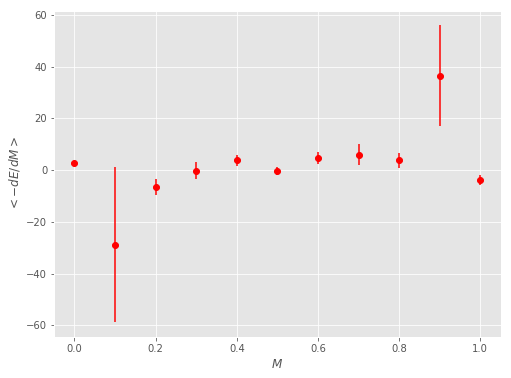

In [44]:
dlogp_m_T20, dlogp_s_T20 = fig_dE(102400, dlogp_one_T20)

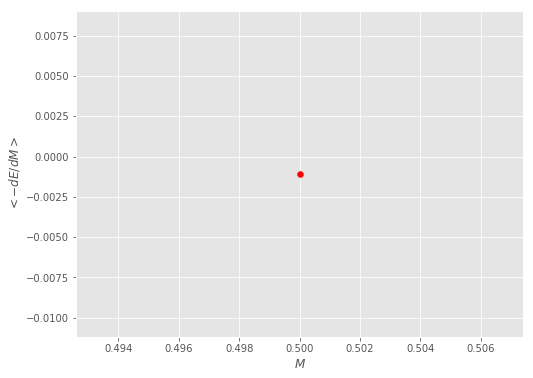

In [45]:
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111)

start = 204000
end = 204800

ax.scatter(model[5], dlogp_one_T20[0][5, start:end].mean(), color='red')
ax.set_xlabel('$M$')
ax.set_ylabel('$<-dE/dM>$')

#plt.savefig('teireikai_20190220_BayesFactorPath1.png')

plt.show()

In [50]:
suitei = np.array([0.49, 0.5, 0.51])
energy_mprime = np.zeros([suitei.shape[0], 800])
dE_mprime = np.zeros([suitei.shape[0], 800])

for i in range(suitei.shape[0]):
    for j in range(800):
        energy_mprime[i, j] = energy(suitei[i], de0_one_T20[0][5, 204000+j], de1_one_T20[0][5, 204000+j], 
                                     ka_one_T20[0][5, 204000+j], kd_one_T20[0][5, 204000+j],
                                     sigma_one_T20[0][5, 204000+j])
        dE_mprime[i, j] = dlog_p(suitei[i], de0_one_T20[0][5, 204000+j], de1_one_T20[0][5, 204000+j], 
                                 ka_one_T20[0][5, 204000+j], kd_one_T20[0][5, 204000+j],
                                 sigma_one_T20[0][5, 204000+j])

In [53]:
print(energy_one_T20[0][5, 204790:])
print(energy_mprime[1, 790:])

print(energy_one_T20[0][5, 204790:]-energy_mprime[1, 790:])

[-61.54763416 -61.54755924 -61.54761596 -61.54768253 -61.58154777
 -61.58154776 -61.68133059 -61.58916699 -61.49719548 -61.49742685]
[-61.54763416 -61.54755924 -61.54761596 -61.54768253 -61.58154777
 -61.58154776 -61.68133059 -61.58916699 -61.49719548 -61.49742685]
[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]


In [47]:
# shitei = 102395
# for i in range(11):
#     print(energy_one_T20[0][i, shitei])
#     for m in range(11):
#         ener = energy(model[m], de0_one_T20[0][i, shitei], de1_one_T20[0][i, shitei], ka_one_T20[0][i, shitei], 
#                 kd_one_T20[0][i, shitei], sigma_one_T20[0][i, shitei])
#         if energy_one_T20[0][i, shitei] == ener:
#             print(model[m], ener)
#     print('\n')
    
#print(energy(0.1, 4.6435207183075295, 216.8025710585665, 81.6485746147184, 1.535008192152066, 0.0010479321584274614))

In [48]:
# print(dlog_p(1, 126.31, 17.52, 14.30, 71.97, 7.08e-5))

In [49]:
# shitei = 102395
# for i in range(11):
#     print(dlogp_one_T20[0][i, shitei])
#     for m in range(11):
#         dener = dlog_p(model[m], de0_one_T20[0][i, shitei], de1_one_T20[0][i, shitei], ka_one_T20[0][i, shitei], 
#                        kd_one_T20[0][i, shitei], sigma_one_T20[0][i, shitei])
#         if dlogp_one_T20[0][i, shitei]==dener:
#             print(model[m], dener)

#     print('\n')

In [54]:
bunbo = np.zeros([suitei.shape[0], 800])
bunshi = np.zeros([suitei.shape[0], 800])

for i in range(suitei.shape[0]):
    for j in range(800):
        bunbo[i, j] = np.exp(-energy_mprime[i, j]+energy_one_T20[0][5, 204000+j])
        bunshi[i, j] = np.exp(-energy_mprime[i, j]+energy_one_T20[0][5, 204000+j])*dE_mprime[i, j]

In [57]:
print(-energy_mprime[1, 790:]+energy_one_T20[0][5, 204790:])

[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]


In [59]:
print(bunbo)

[[ 0.99999913  0.99999916  1.00000116 ...,  1.00000302  1.00000296
   1.00000758]
 [ 1.          1.          1.         ...,  1.          1.          1.        ]
 [ 1.00000087  1.00000084  0.99999884 ...,  0.99999698  0.99999704
   0.99999242]]


In [60]:
print(bunshi)

[[  8.65228702e-05   8.43214755e-05  -1.16096947e-04 ...,  -3.01830963e-04
   -2.96181018e-04  -7.58167863e-04]
 [  8.65216821e-05   8.43203140e-05  -1.16098329e-04 ...,  -3.01837394e-04
   -2.96187346e-04  -7.58198486e-04]
 [  8.65204939e-05   8.43191524e-05  -1.16099712e-04 ...,  -3.01843825e-04
   -2.96193673e-04  -7.58229108e-04]]


1.00001060996
1.0
0.999989360087


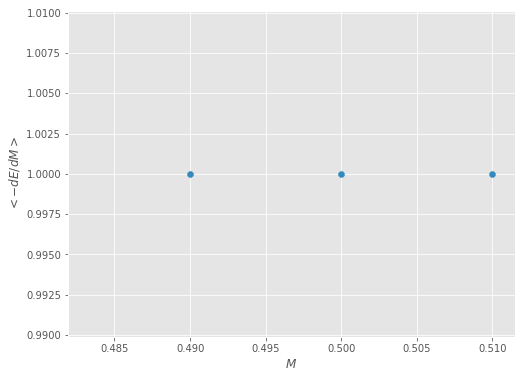

In [62]:
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111)
cycle = plt.rcParams['axes.prop_cycle'].by_key()['color']

#ax.scatter(model[5], dlogp_one_T20[0][5, start:end].mean(), color='red')
for i in range(suitei.shape[0]):
    ax.scatter(suitei[i], bunbo[i, ].mean(), color=cycle[1])
    print(bunbo[i, ].mean())
    
ax.set_xlabel('$M$')
ax.set_ylabel('$<-dE/dM>$')

#plt.savefig('teireikai_20190220_BayesFactorPath1.png')

plt.show()

-0.00105948567515
-0.00106249421872
-0.00106549914588


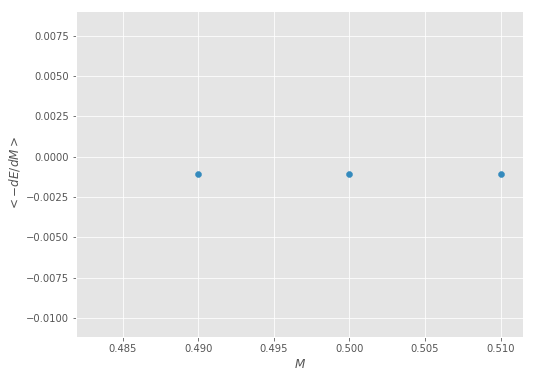

In [64]:
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111)
cycle = plt.rcParams['axes.prop_cycle'].by_key()['color']

start = 204000
end = 204800

#ax.scatter(model[5], dlogp_one_T20[0][5, start:end].mean(), color='red')
for i in range(suitei.shape[0]):
    ax.scatter(suitei[i], bunshi[i, ].mean()/bunbo[i, ].mean(), color=cycle[1])
    print(bunshi[i, ].mean()/bunbo[i, ].mean())
    
ax.set_xlabel('$M$')
ax.set_ylabel('$<-dE/dM>$')

#plt.savefig('teireikai_20190220_BayesFactorPath1.png')

plt.show()

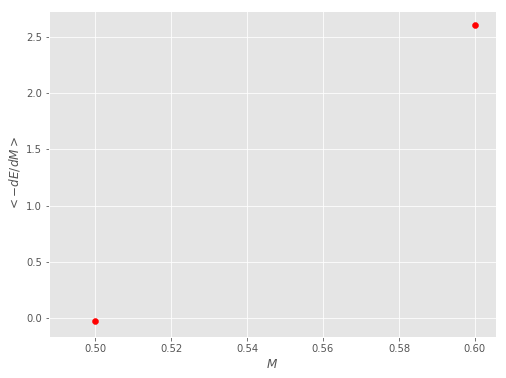

In [72]:
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111)

start = 100000
end = 102400

ax.scatter(model[5], dlogp_one_T20[0][5, start:end].mean(), color='red')
ax.scatter(model[6], dlogp_one_T20[0][6, start:end].mean(), color='red')
ax.set_xlabel('$M$')
ax.set_ylabel('$<-dE/dM>$')

#plt.savefig('teireikai_20190220_BayesFactorPath1.png')

plt.show()

In [108]:
%%time

start = 2400

suitei_5 = np.array([0.5, 0.51, 0.52, 0.53, 0.54, 0.55])
suitei_6 = np.array([0.55, 0.56, 0.57, 0.58, 0.59, 0.6])
energy_mprime_5 = np.zeros([suitei_5.shape[0], start])
dE_mprime_5 = np.zeros([suitei_5.shape[0], start])
energy_mprime_6 = np.zeros([suitei_6.shape[0], start])
dE_mprime_6 = np.zeros([suitei_6.shape[0], start])

for i in range(suitei_5.shape[0]):
    for j in range(start):
        energy_mprime_5[i, j] = energy(suitei_5[i], de0_one_T20[0][5, 202400+j], de1_one_T20[0][5, 202400+j], 
                                     ka_one_T20[0][5, 202400+j], kd_one_T20[0][5, 202400+j],
                                     sigma_one_T20[0][5, 202400+j])
        dE_mprime_5[i, j] = dlog_p(suitei_5[i], de0_one_T20[0][5, 202400+j], de1_one_T20[0][5, 202400+j], 
                                 ka_one_T20[0][5, 202400+j], kd_one_T20[0][5, 202400+j],
                                 sigma_one_T20[0][5, 202400+j])
        
        energy_mprime_6[i, j] = energy(suitei_6[i], de0_one_T20[0][6, 202400+j], de1_one_T20[0][6, 202400+j], 
                                     ka_one_T20[0][6, 202400+j], kd_one_T20[0][6, 202400+j],
                                     sigma_one_T20[0][6, 202400+j])
        dE_mprime_6[i, j] = dlog_p(suitei_6[i], de0_one_T20[0][6, 202400+j], de1_one_T20[0][6, 202400+j], 
                                 ka_one_T20[0][6, 202400+j], kd_one_T20[0][6, 202400+j],
                                 sigma_one_T20[0][6, 202400+j])
    print(i)

0
1
2
3
4
5
Wall time: 5min 19s


In [109]:
bunbo_5 = np.zeros([suitei_5.shape[0], start])
bunshi_5 = np.zeros([suitei_5.shape[0], start])
bunbo_6 = np.zeros([suitei_6.shape[0], start])
bunshi_6 = np.zeros([suitei_6.shape[0], start])


for i in range(suitei_5.shape[0]):
    for j in range(start):
        bunbo_5[i, j] = np.exp(-energy_mprime_5[i, j]+energy_one_T20[0][5, 202400+j])
        bunshi_5[i, j] = np.exp(-energy_mprime_5[i, j]+energy_one_T20[0][5, 202400+j])*dE_mprime_5[i, j]
        
        bunbo_6[i, j] = np.exp(-energy_mprime_6[i, j]+energy_one_T20[0][6, 202400+j])
        bunshi_6[i, j] = np.exp(-energy_mprime_6[i, j]+energy_one_T20[0][6, 202400+j])*dE_mprime_6[i, j]

In [110]:
print(dlogp_one_T20[0][5, 202400:204800])
print(bunshi_5[0])

print(dlogp_one_T20[0][5, 202400:204800]-bunshi_5[0])

[  8.19954478e-06   8.07473640e-06   3.80656391e-06 ...,  -3.01837394e-04
  -2.96187346e-04  -7.58198486e-04]
[  8.19954478e-06   8.07473640e-06   3.80656391e-06 ...,  -3.01837394e-04
  -2.96187346e-04  -7.58198486e-04]
[ -1.69406589e-21  -3.38813179e-21   8.47032947e-22 ...,   0.00000000e+00
   0.00000000e+00   0.00000000e+00]


In [119]:
print(dlogp_one_T20[0][6, 202400:204800])
print(bunshi_6[5])

print(dlogp_one_T20[0][6, 202400:204800]-bunshi_6[5])
print(bunbo_6[5])

[-12.81532944 -12.83424796 -12.87434093 ...,  -5.73182557  -6.0978496
  -6.07077418]
[-12.81532944 -12.83424796 -12.87434093 ...,  -5.73182557  -6.0978496
  -6.07077418]
[ -3.55271368e-15  -3.55271368e-15  -3.55271368e-15 ...,   3.90798505e-14
   0.00000000e+00  -8.88178420e-16]
[ 1.  1.  1. ...,  1.  1.  1.]


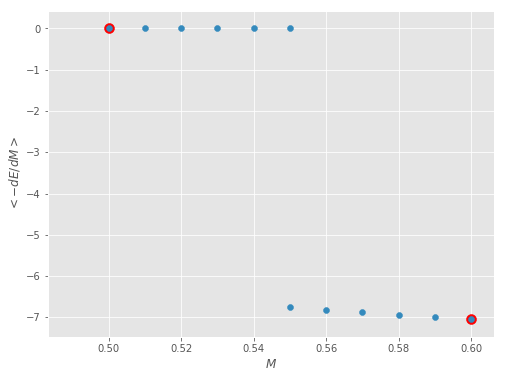

In [120]:
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111)
cycle = plt.rcParams['axes.prop_cycle'].by_key()['color']

start = 202400
end = 204800

ax.scatter(model[5], dlogp_one_T20[0][5, start:end].mean(), color='red', s=100)
ax.scatter(model[6], dlogp_one_T20[0][6, start:end].mean(), color='red', s=100)

#ax.scatter(model[5], dlogp_one_T20[0][5, start:end].mean(), color='red')
for i in range(suitei_5.shape[0]):
    ax.scatter(suitei_5[i], bunshi_5[i, ].mean()/bunbo_5[i, ].mean(), color=cycle[1])
    ax.scatter(suitei_6[i], bunshi_6[i, ].mean()/bunbo_6[i, ].mean(), color=cycle[1])
    
    
ax.set_xlabel('$M$')
ax.set_ylabel('$<-dE/dM>$')

#plt.savefig('teireikai_20190220_BayesFactorPath1.png')

plt.show()

In [111]:
print(bunbo_5)
print(bunshi_5.shape)

[[ 1.          1.          1.         ...,  1.          1.          1.        ]
 [ 1.00000008  1.00000008  1.00000004 ...,  0.99999698  0.99999704
   0.99999242]
 [ 1.00000016  1.00000016  1.00000008 ...,  0.99999396  0.99999408
   0.99998484]
 [ 1.00000025  1.00000024  1.00000011 ...,  0.99999094  0.99999111
   0.99997725]
 [ 1.00000033  1.00000032  1.00000015 ...,  0.99998793  0.99998815
   0.99996967]
 [ 1.00000041  1.0000004   1.00000019 ...,  0.99998491  0.99998519
   0.99996209]]
(6, 2400)


In [121]:
%%time

start = 4800

suitei_5 = np.array([0.5, 0.51, 0.52, 0.53, 0.54, 0.55])
suitei_6 = np.array([0.55, 0.56, 0.57, 0.58, 0.59, 0.6])
energy_mprime_5 = np.zeros([suitei_5.shape[0], start])
dE_mprime_5 = np.zeros([suitei_5.shape[0], start])
energy_mprime_6 = np.zeros([suitei_6.shape[0], start])
dE_mprime_6 = np.zeros([suitei_6.shape[0], start])

for i in range(suitei_5.shape[0]):
    for j in range(start):
        energy_mprime_5[i, j] = energy(suitei_5[i], de0_one_T20[0][5, 200000+j], de1_one_T20[0][5, 200000+j], 
                                     ka_one_T20[0][5, 200000+j], kd_one_T20[0][5, 200000+j],
                                     sigma_one_T20[0][5, 200000+j])
        dE_mprime_5[i, j] = dlog_p(suitei_5[i], de0_one_T20[0][5, 200000+j], de1_one_T20[0][5, 200000+j], 
                                 ka_one_T20[0][5, 200000+j], kd_one_T20[0][5, 200000+j],
                                 sigma_one_T20[0][5, 200000+j])
        
        energy_mprime_6[i, j] = energy(suitei_6[i], de0_one_T20[0][6, 200000+j], de1_one_T20[0][6, 200000+j], 
                                     ka_one_T20[0][6, 200000+j], kd_one_T20[0][6, 200000+j],
                                     sigma_one_T20[0][6, 200000+j])
        dE_mprime_6[i, j] = dlog_p(suitei_6[i], de0_one_T20[0][6, 200000+j], de1_one_T20[0][6, 200000+j], 
                                 ka_one_T20[0][6, 200000+j], kd_one_T20[0][6, 200000+j],
                                 sigma_one_T20[0][6, 200000+j])
    print(i)

0
1
2
3
4
5
Wall time: 9min 56s


In [134]:
start = 4800

bunbo_5 = np.zeros([suitei_5.shape[0], start])
bunshi_5 = np.zeros([suitei_5.shape[0], start])
bunbo_6 = np.zeros([suitei_6.shape[0], start])
bunshi_6 = np.zeros([suitei_6.shape[0], start])

for i in range(suitei_5.shape[0]):
    for j in range(start):
        bunbo_5[i, j] = np.exp(-energy_mprime_5[i, j]+energy_one_T20[0][5, 200000+j])
        bunshi_5[i, j] = np.exp(-energy_mprime_5[i, j]+energy_one_T20[0][5, 200000+j])*dE_mprime_5[i, j]
        
        bunbo_6[i, j] = np.exp(-energy_mprime_6[i, j]+energy_one_T20[0][6, 200000+j])
        bunshi_6[i, j] = np.exp(-energy_mprime_6[i, j]+energy_one_T20[0][6, 200000+j])*dE_mprime_6[i, j]

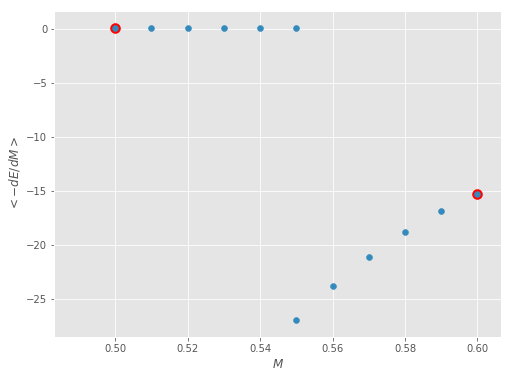

In [135]:
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111)
cycle = plt.rcParams['axes.prop_cycle'].by_key()['color']

start = 200000
end = 204800

ax.scatter(model[5], dlogp_one_T20[0][5, start:end].mean(), color='red', s=100)
ax.scatter(model[6], dlogp_one_T20[0][6, start:end].mean(), color='red', s=100)

#ax.scatter(model[5], dlogp_one_T20[0][5, start:end].mean(), color='red')
for i in range(suitei_5.shape[0]):
    ax.scatter(suitei_5[i], bunshi_5[i, ].mean()/bunbo_5[i, ].mean(), color=cycle[1])
    ax.scatter(suitei_6[i], bunshi_6[i, ].mean()/bunbo_6[i, ].mean(), color=cycle[1])
    
    
ax.set_xlabel('$M$')
ax.set_ylabel('$<-dE/dM>$')

#plt.savefig('teireikai_20190220_BayesFactorPath1.png')

plt.show()

In [127]:
print(energy_one_T20[0].shape)
print(dE_mprime_5.shape)

(11, 204800)
(6, 4800)
